## Задание 1: построить функции принадлежности

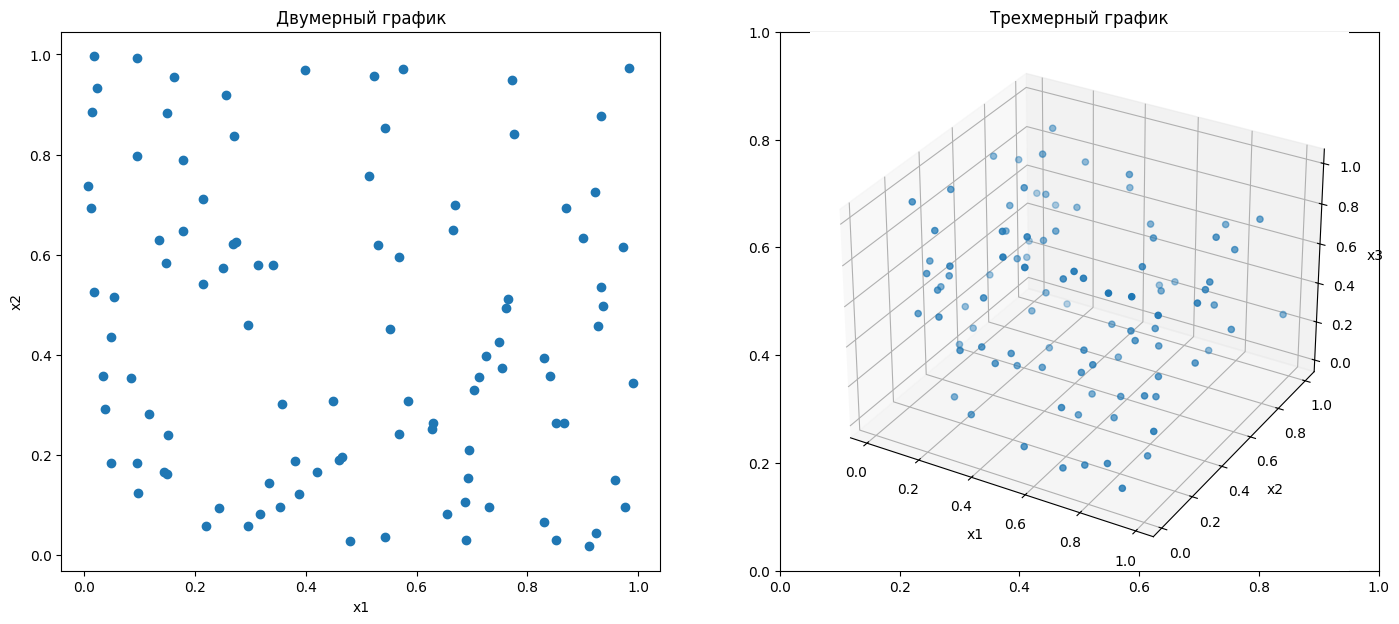

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_size = 100
x1 = np.random.rand(data_size, 1)
x2 = np.random.rand(data_size, 1)
x3 = np.random.rand(data_size, 1)

# Создаем subplots с одной строкой и двумя столбцами
fig, axs = plt.subplots(1, 2, figsize=(17, 7))

# Первый subplot - Двумерный график
axs[0].scatter(x1, x2)
axs[0].set_title('Двумерный график')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')

# Второй subplot - Трехмерный график
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x1, x2, x3)
ax.set_title('Трехмерный график')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()


/home/ol/Code/University/master/1-sem/fuzzy-logic/1-lab/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


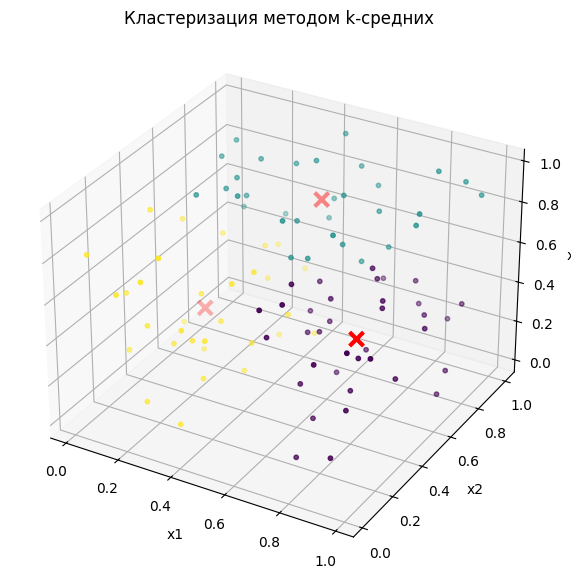

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data_size = 100
x1 = np.random.rand(data_size, 1)
x2 = np.random.rand(data_size, 1)
x3 = np.random.rand(data_size, 1)

data = np.concatenate((x1, x2, x3), axis=1)
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# График кластеризации
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter3D(x1, x2, x3, c=labels, cmap='viridis', s=10)
ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100, linewidths=3)

ax.set_title('Кластеризация методом k-средних')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()


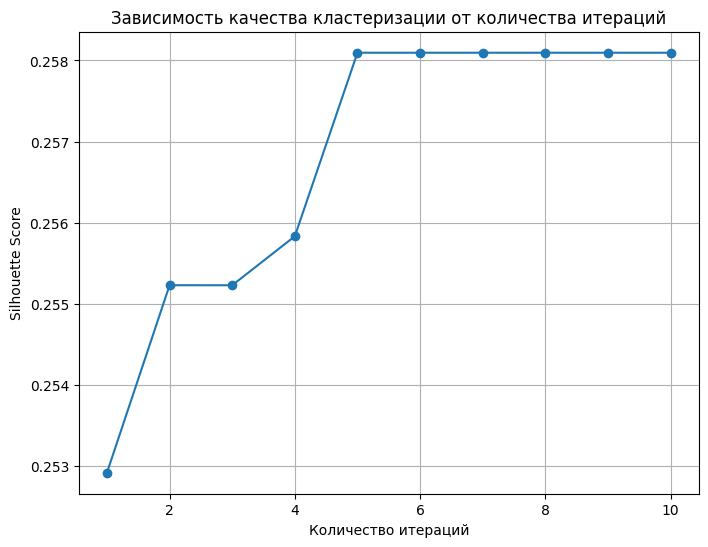

In [32]:
data_size = 100

data = np.concatenate((x1, x2, x3), axis=1)
num_clusters = 3
max_iterations = 10

silhouette_scores = np.zeros(max_iterations)

for i in range(1, max_iterations + 1):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=i, n_init=10, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Вычисляем Silhouette Score
    silhouette_scores[i - 1] = silhouette_score(data, labels)

# Построение графика зависимости качества от количества итераций
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_iterations + 1), silhouette_scores, 'o-')
plt.grid(True)
plt.title('Зависимость качества кластеризации от количества итераций')
plt.xlabel('Количество итераций')
plt.ylabel('Silhouette Score')
plt.show()


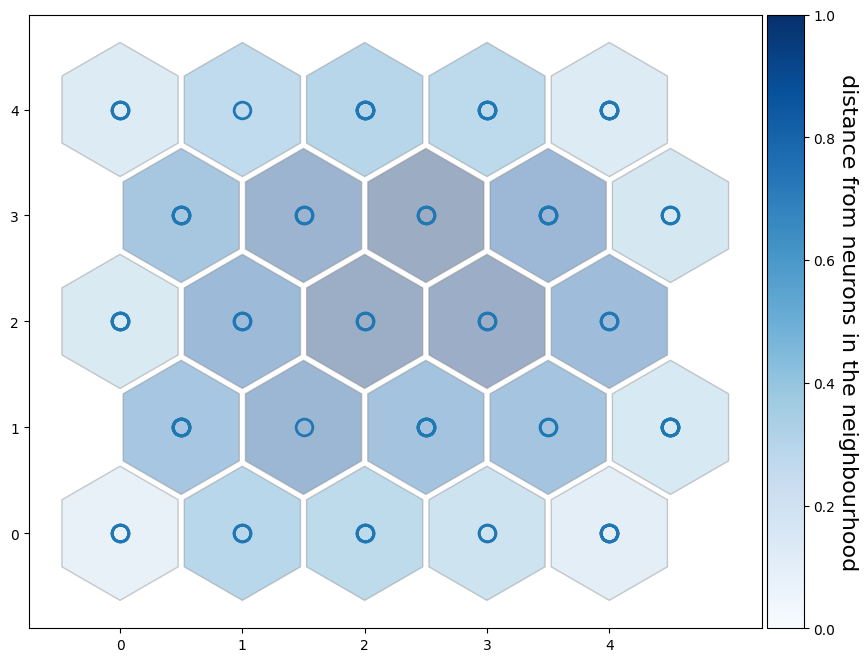

In [52]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar

data = np.random.rand(100, 2)

som_net = MiniSom(5, 5, 2, sigma=1.5, learning_rate=0.7, activation_distance='euclidean',
                topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som_net.train_random(data, 1000)

xx, yy = som_net.get_euclidean_coordinates()
umatrix = som_net.distance_map()
weights = som_net.get_weights()

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# Добавляем гексагоны по одному
for i in range(weights.shape[0]):
   for j in range(weights.shape[1]):
       wy = yy[(i, j)] * np.sqrt(3) / 2
       hex = RegularPolygon((xx[(i, j)], wy), 
                           numVertices=6, 
                           radius=.95 / np.sqrt(3),
                           facecolor=cm.Blues(umatrix[i, j]), 
                           alpha=.4, 
                           edgecolor='gray')
       ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(data):
   w = som_net.winner(x)
   wx, wy = som_net.convert_map_to_euclidean(w) 
   wy = wy * np.sqrt(3) / 2
   plt.plot(wx, wy, 
            markers[0], # Мы не можем определить класс, поэтому используем один маркер
            markerfacecolor='None',
            markeredgecolor=colors[0], # Мы не можем определить класс, поэтому используем один цвет
            markersize=12, 
            markeredgewidth=2)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                          orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

plt.show()


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1483038604251285


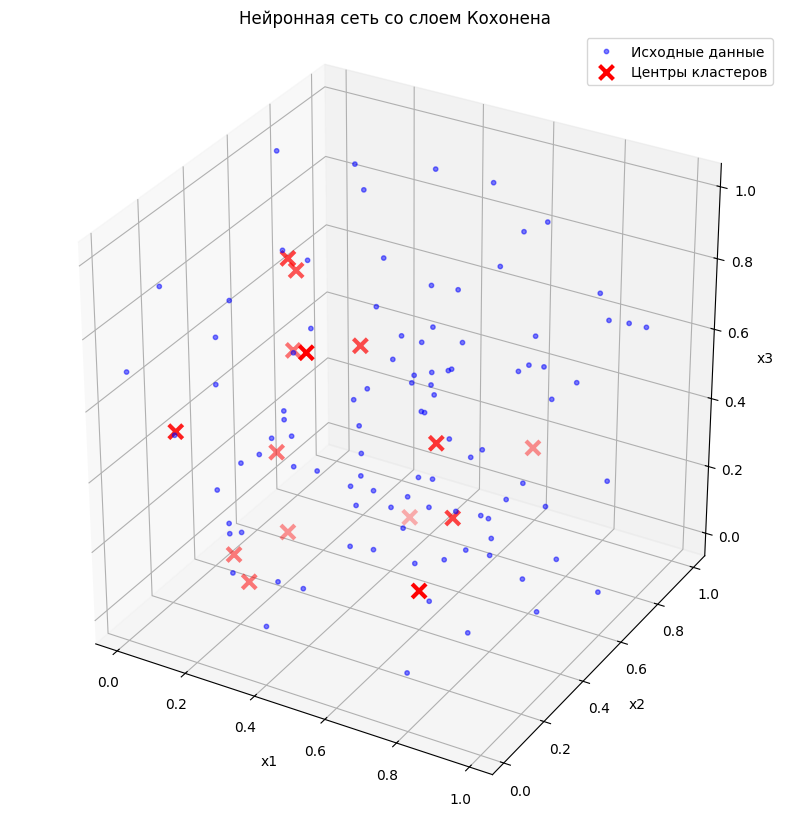

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных трёхмерных данных
data = np.random.rand(100, 3)

# Создание и обучение карты Кохонена
som = MiniSom(5, 5, data.shape[1], sigma=1.5, learning_rate=0.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train(data, 1000, verbose=True)

# Получение центров кластеров
cluster_centers = som.get_weights()

# Визуализация исходных данных и центров кластеров
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=10, c='blue', alpha=0.5)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=100, c='red', marker='x', linewidth=3)

plt.title('Нейронная сеть со слоем Кохонена')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('x3')
plt.legend(['Исходные данные', 'Центры кластеров'])

plt.show()
